# Exercise H2.1: Connectionist Neuron

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import csv
import math
%matplotlib inline

## a>

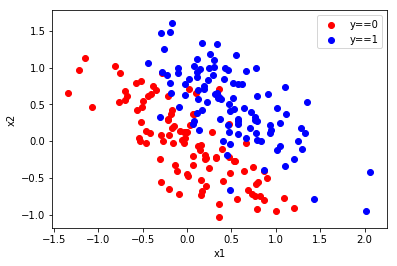

In [2]:
x1_array = []
x2_array = []
y_array = []
with open("applesOranges.csv") as f:
    reader = csv.reader(f)
    next(reader, None)
    for row in reader:
        x1_array.append(float(row[0]))
        x2_array.append(float(row[1]))
        y_array.append(float(row[2]))
# print x1
# print x2
# print y
x1 = np.array(x1_array)
x2 = np.array(x2_array)
X = np.array(zip(x1, x2)).T
# print x.shape
y = np.array(y_array)
plt.scatter(x1[y==0], x2[y==0], color='r', label='y==0')
plt.scatter(x1[y==1], x2[y==1], color='b', label='y==1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## b>

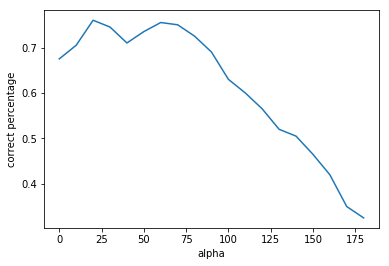

In [3]:
def predict(w, X, bias):
    # W: d*1
    # X: d*n
    ret = np.sign(w.T.dot(X) - bias)
    ret[ret == -1] = 0
    return ret

theta = 0
correct_percentage = []
alpha = np.arange(0, 180 + 1, 10)
w1 = np.cos(alpha * math.pi / 180)
w2 = np.sin(alpha * math.pi / 180)
W = np.array(zip(w1,w2)).T
# print W.shape, X.shape
for w in W.T:
    y_estimate = predict(w, X, theta)
    correct_percentage.append(np.sum(y_estimate == y)/float(y.shape[0]))

plt.plot(alpha, correct_percentage)
plt.xlabel('alpha')
plt.ylabel('correct percentage')
plt.show()



## c>

optimal bias:  0.12


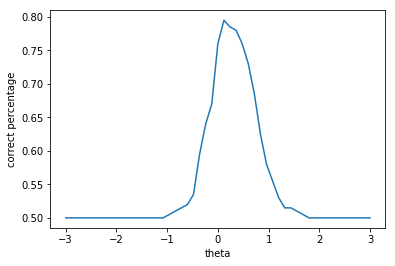

In [4]:
w_optimal = W.T[np.argmax(correct_percentage)]
correct_percentage = []
theta = np.arange(-3, 3+1e-05, 6.0/50)
for i in theta:
    correct_percentage.append(np.sum(predict(w_optimal, X, i) == y)/float(y.shape[0]))
theta_optimal = theta[np.argmax(correct_percentage)]
print "optimal bias: " , theta_optimal
plt.plot(theta, correct_percentage)
plt.xlabel('theta')
plt.ylabel('correct percentage')
plt.show()

## d>

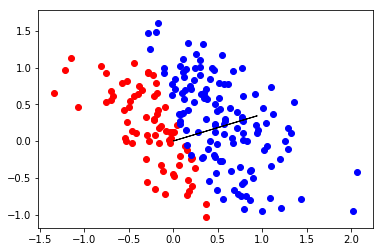

In [5]:
y_pred = predict(w_optimal, X, theta_optimal)
plt.scatter(x1[y_pred==0], x2[y_pred==0], color='r')
plt.scatter(x1[y_pred==1], x2[y_pred==1], color='b')
plt.arrow(0, 0, w_optimal[0], w_optimal[1])

**w** is vertical to the boundary between apples and oranges.

## e>

END


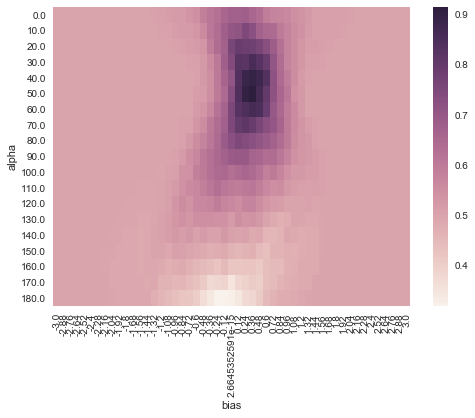

In [6]:
import seaborn as sbn
import pandas as pd
correct_percentage = []
for w in W.T:
    for t in theta:
        correct_percentage.append(np.sum(predict(w, X, t) == y)/float(y.shape[0]))
correct_percentage_ret = np.array(correct_percentage)
# print correct_percentage_ret.shape
theta_tile = np.tile(theta, alpha.shape[0])
alpha_repeat =  np.repeat(alpha, theta.shape[0])
# print alpha.shape, theta.shape
heatmap_data = pd.DataFrame(data=np.column_stack((alpha_repeat, theta_tile, correct_percentage_ret)),  
                            columns=["alpha", "bias", "performance"])
heatmap_data = heatmap_data.pivot("alpha", "bias", "performance")
sbn.heatmap(heatmap_data)
print "END"
#

## f>

No. First of all, in practice, it's hard for us to know the precise range for those paramters in advance. Second, even though we know the range of parameters, if we have more parameters, the algorithm complexitity will grow exponentially.

# Exercise H2.2: Mulit-layer Perceptrons

## a>

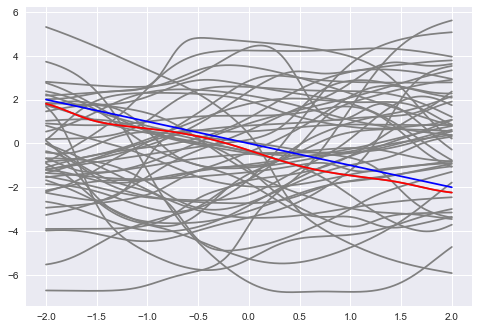

In [28]:
def MLP_predict(x, w, a, b):
    return np.sum(w*np.tanh(a*(-b+x)))

X = np.arange(-2, 2+1e-05, 0.01)
def calc_and_plot(mean, var):
    mean_err_min = 1000000000
    y_predict_optimal = None
    for i in range(0, 50):
        y_predict = []
        err_squared = 0
        a = np.random.normal(mean, var, 10)
        b = np.random.uniform(-2, 2, 10)
        w = np.random.normal(0, 1, 10)
        for x in X:
            y = MLP_predict(x, w, a, b)
            y_predict.append(y)
            err_squared = err_squared + (y+x)**2
        if(err_squared < mean_err_min):
            mean_err_min = err_squared
            y_predict_optimal = y_predict
        plt.plot(X, y_predict, color='grey')
    plt.plot(X, y_predict_optimal, color='r')
    plt.plot(X, -X, color='b')
        
calc_and_plot(0, 2)
plt.show()

## b>

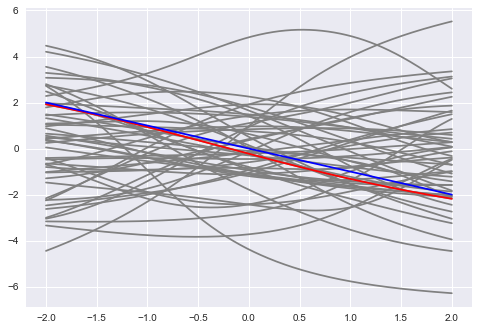

In [29]:
calc_and_plot(0, 0.5)
plt.show()